<a href="https://colab.research.google.com/github/ninja03jod/Machine_Learning_Projects/blob/main/Fetching_Companies_Data_from_AmbitionBox_using_Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [3]:
requests.get("https://www.ambitionbox.com/list-of-companies")
# response = 403 means page not found
# 200 means accessed
# 500 mean server down

<Response [403]>

In [4]:
# if we wants text means why page is not found then use .text
requests.get("https://www.ambitionbox.com/list-of-companies?page=1").text

'<HTML><HEAD>\n<TITLE>Access Denied</TITLE>\n</HEAD><BODY>\n<H1>Access Denied</H1>\n \nYou don\'t have permission to access "http&#58;&#47;&#47;www&#46;ambitionbox&#46;com&#47;list&#45;of&#45;companies&#63;" on this server.<P>\nReference&#32;&#35;18&#46;f3c83017&#46;1706435052&#46;233f0074\n</BODY>\n</HTML>\n'

In [5]:
# In webscraping while supplying directly URL we are getting text that will be -> access is denied
# due to website data we are going to fetch that they don't have their API
# Beacuse of supplying direct URL website assumes that the sender is bot so they denied the access
# If we are able to create USER-String or we can say create request / header and paste it
# so website assumes that request we are gettig from browser through human being
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36','Accept-Language': 'en-US,en;q=0.5','Referer': 'https://www.google.com/',}
requests.get("https://www.ambitionbox.com/list-of-companies?page=1",headers=headers)

<Response [200]>

'<!doctype html>\n<html data-n-head-ssr lang="en" data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D">\n  <head >\n    <meta charset="UTF-8">\n    <meta name="viewport" content="width=device-width,initial-scale=1,minimum-scale=1">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge"> \n    <style>@media only screen and (min-width:767px){.trp-img{width:400px!important;max-width:400px!important}}#ab-body{pointer-events:none}</style>\n    <script>window.dataLayer=window.dataLayer||[],window.gtag=window.gtag||function(){window.dataLayer.push(arguments)},gtag("js",new Date)</script>\n\n    <title>List of companies in India | AmbitionBox</title><meta data-n-head="ssr" name="copyright" content="2024 AmbitionBox"><meta data-n-head="ssr" name="revisit-after" content="1 day"><meta data-n-head="ssr" name="application-name" content="AmbitionBox"><meta data-n-head="ssr" name="content-language" content="EN"><meta data-n-head="ssr" name="google-signin-client_id" content="462822053404-hphug4p
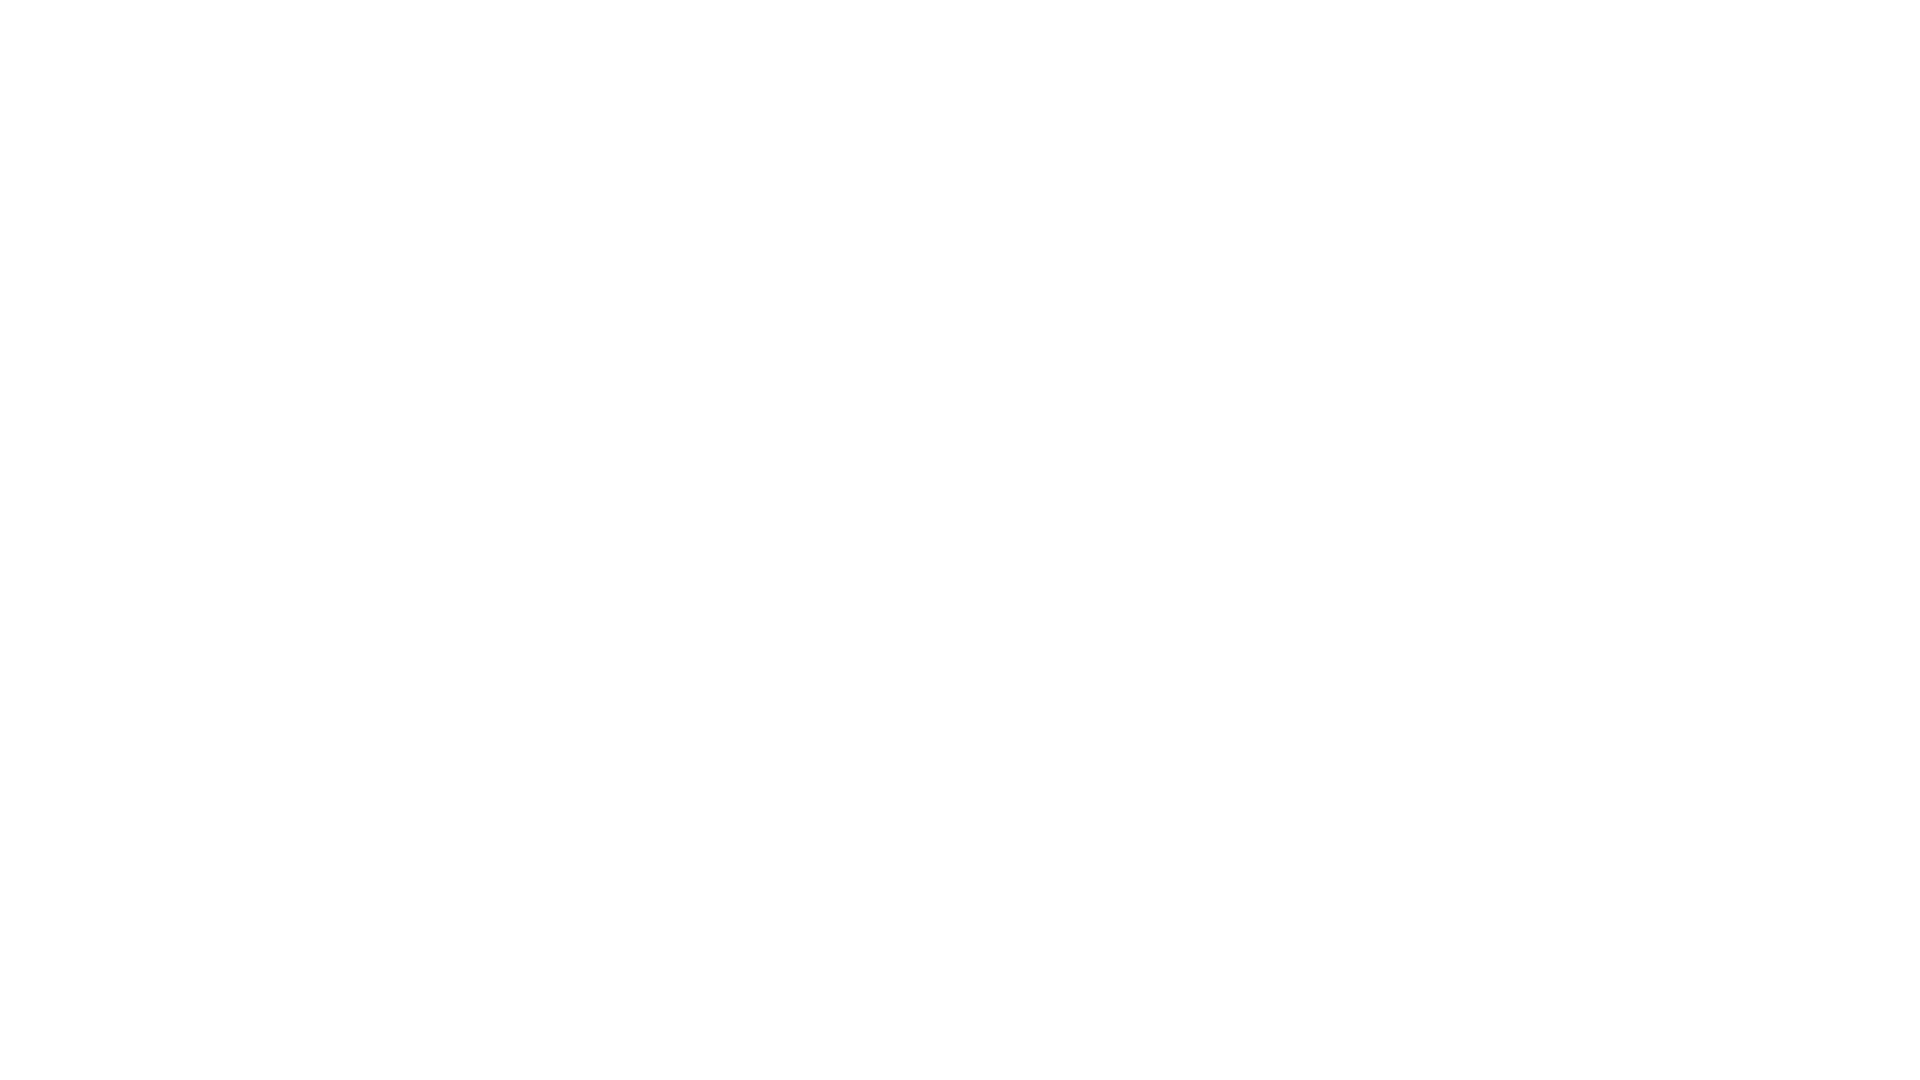
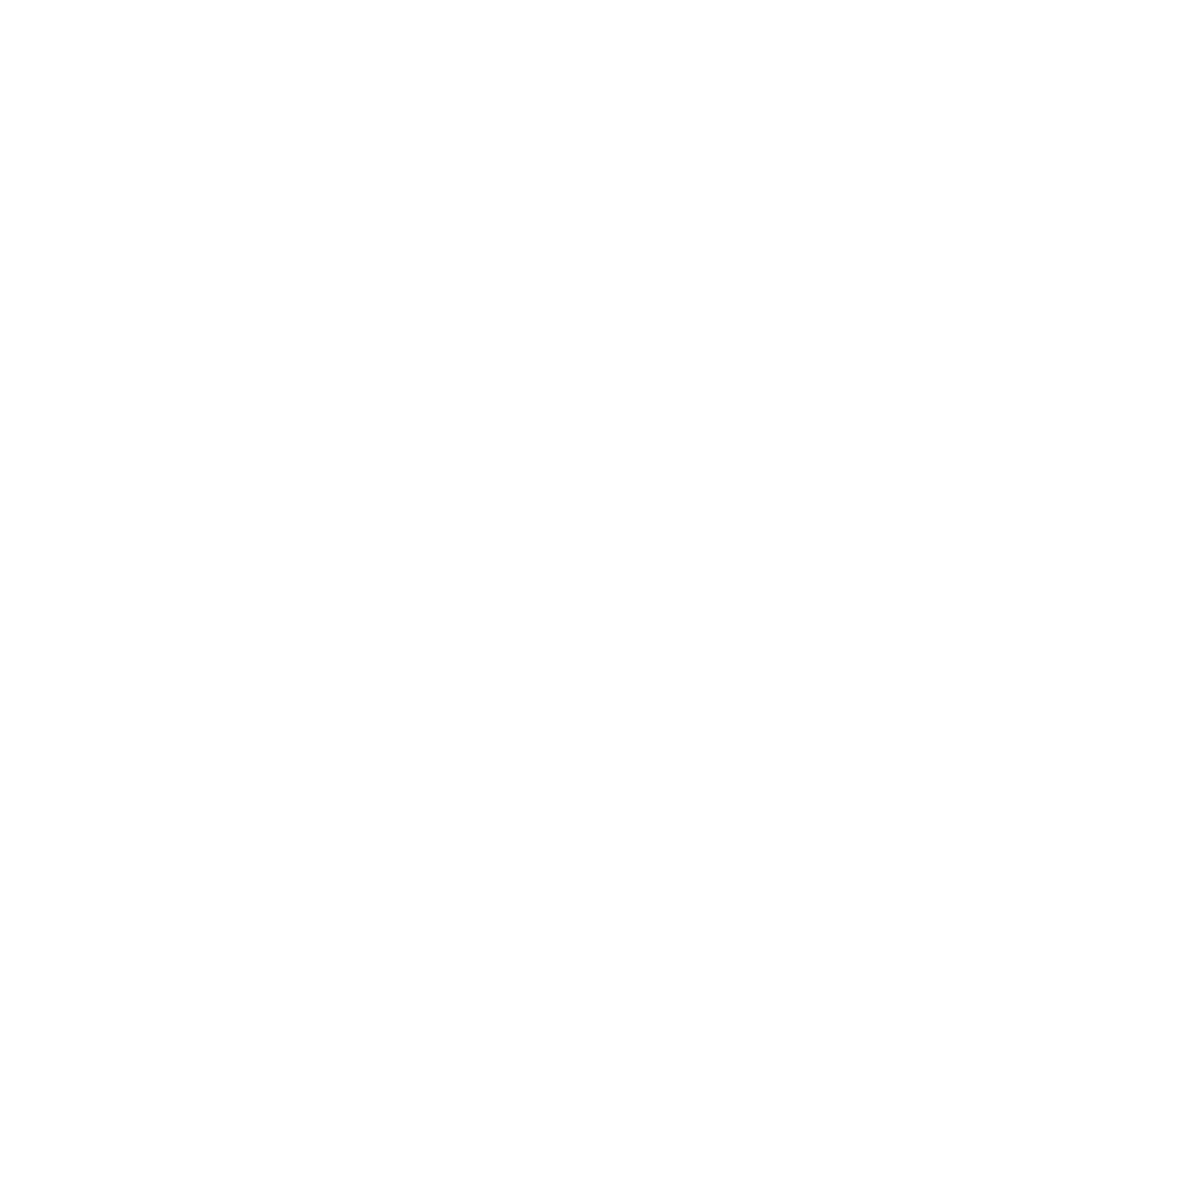

In [6]:
# if we wants HTML code then use text
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36','Accept-Language': 'en-US,en;q=0.5','Referer': 'https://www.google.com/',}
web_page = requests.get("https://www.ambitionbox.com/list-of-companies?page=1",headers=headers).text
web_page

In [ ]:
# if we wants the code of website page then do right click and go to page source will get the HTML code
# if we do right click and inspect then we get each structure code
# for getting each structre code then first we have to click inspect then we have option to select an element to inspect press on it
# so will get each structre code easily

In [7]:
# beautiful soup used for web scraping:
# we can supply the code we fetch into beautiful soup for web sracping purpose
# and we have to supply paser (lxml): which is used to navigate the HTML code and manipulate content more easily.
soup = BeautifulSoup(web_page,'lxml')

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width,initial-scale=1,minimum-scale=1" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <style>
   @media only screen and (min-width:767px){.trp-img{width:400px!important;max-width:400px!important}}#ab-body{pointer-events:none}
  </style>
  <script>
   window.dataLayer=window.dataLayer||[],window.gtag=window.gtag||function(){window.dataLayer.push(arguments)},gtag("js",new Date)
  </script>
  <title>
   List of companies in India | AmbitionBox
  </title>
  <meta content="2024 AmbitionBox" data-n-head="ssr" name="copyright"/>
  <meta content="1 day" data-n-head="ssr" name="revisit-after"/>
  <meta content="AmbitionBox" data-n-head="ssr" name="application-name"/>
  <meta content="EN" data-n-head="ssr" name="content-language"/>
  <meta content="462822053404-hphug4pkahqljh2tc96g35at47o4isv2.app
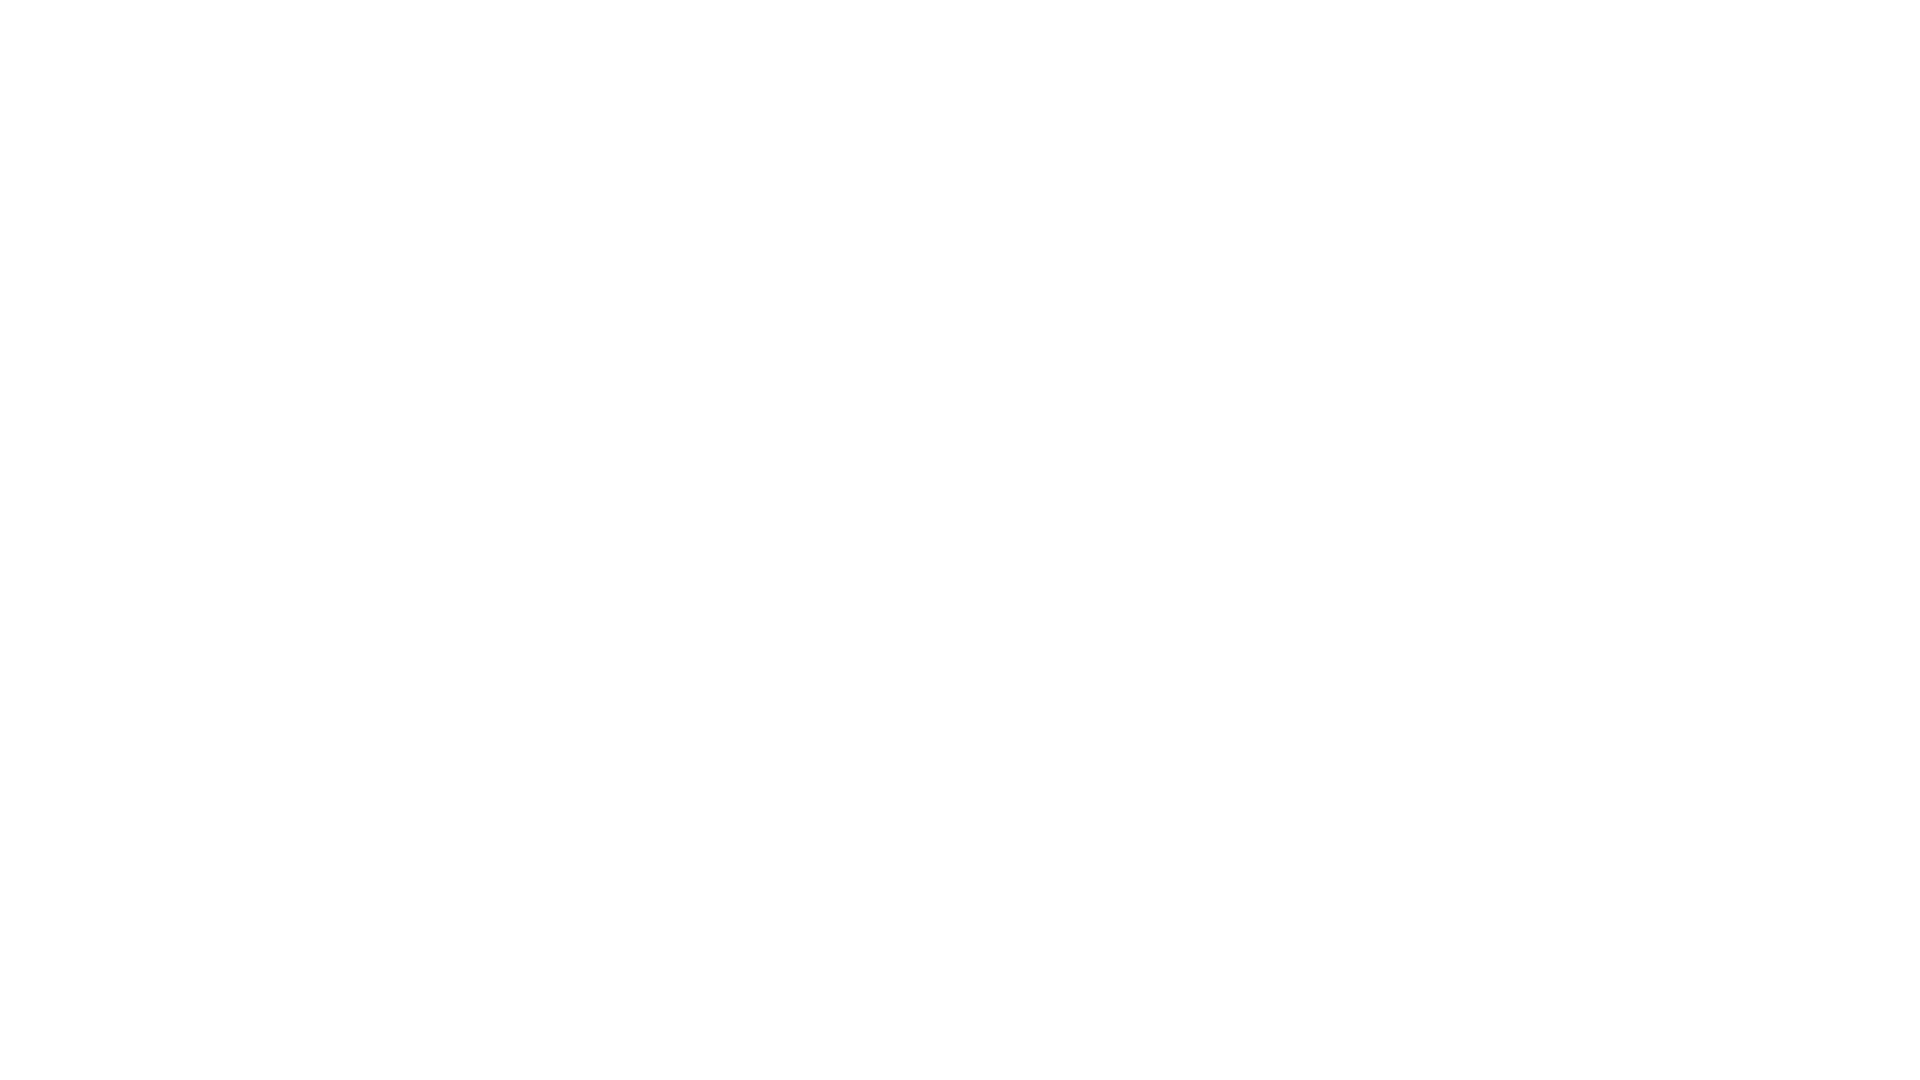
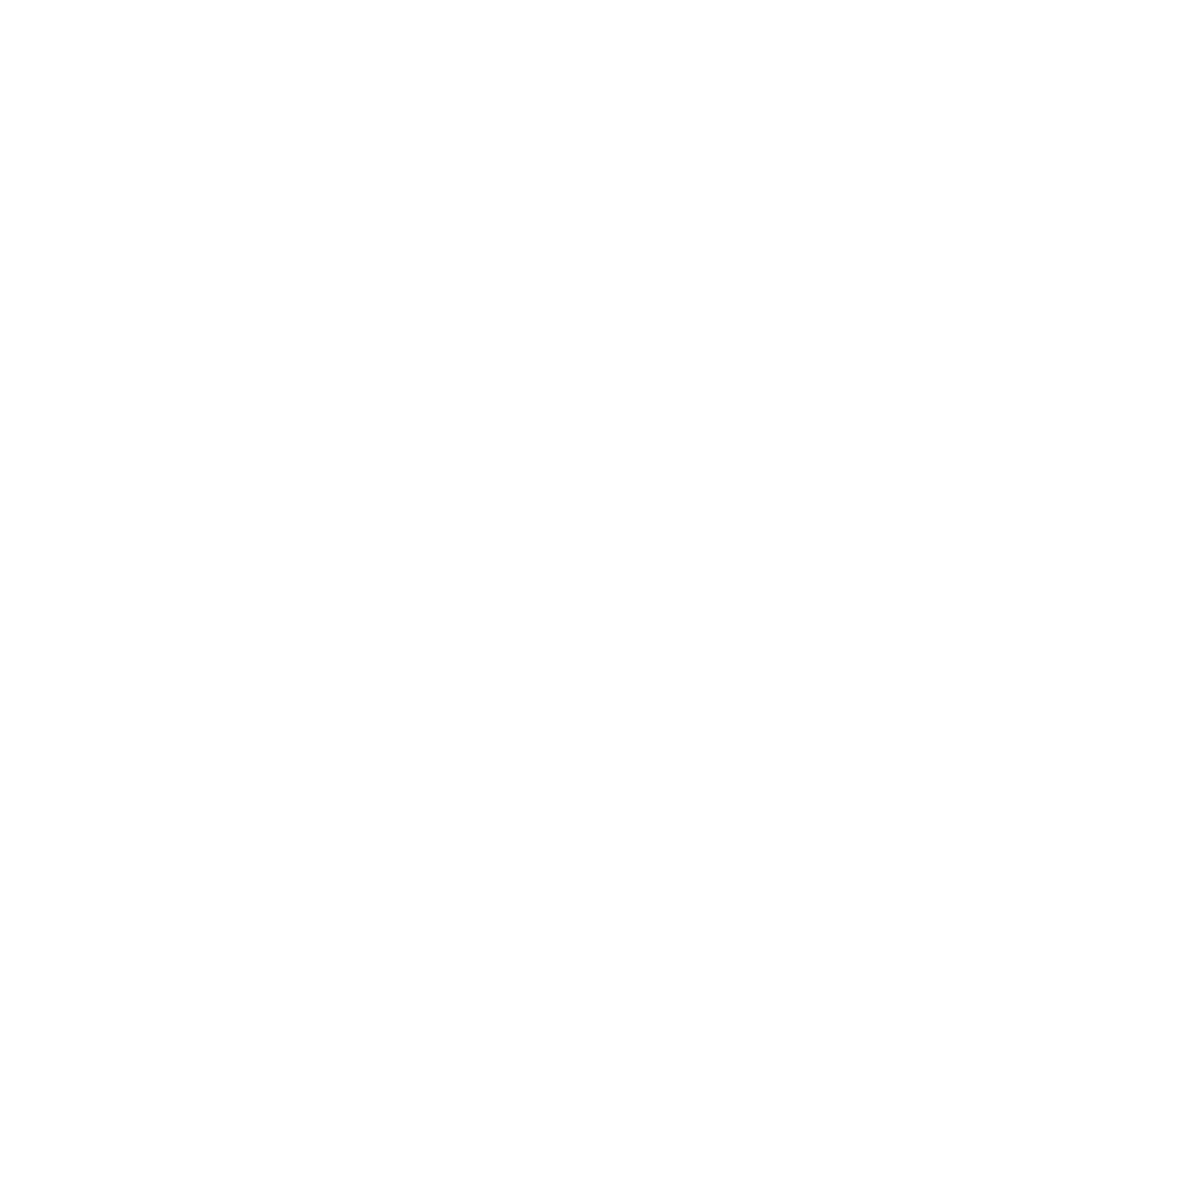

In [8]:
print(soup.prettify())
# prettify is used to format the code

In [9]:
# if we wants to extract tags --> each strcutre has seperate tag or combined tag...
soup.find_all("h1")
# here we have a list so we wants title only then we can use indexing and use .text

[<h1 class="companyListing__title">
 							List of companies in India
 						</h1>]

In [10]:
soup.find_all("h1")[0].text

'\n\t\t\t\t\t\t\tList of companies in India\n\t\t\t\t\t\t'

In [11]:
# in above problem we wants h1 tags and we have only one tag list of companies inside a list
# so we can use indexing and for getting tag name --> use .text
# After this we are getting symbols at prefix and suffix which avail inside a string
# we have str method to remove special symbol and spaces which is called as strip
soup.find_all("h1")[0].text.strip()

'List of companies in India'

In [12]:
# lets see the h2 tags:
soup.find_all("h2")
# In h2 tags we have company names inside a list

[<h2 class="companyCardWrapper__companyName" title="TCS">
 										TCS
 									</h2>,
 <h2 class="companyCardWrapper__companyName" title="Accenture">
 										Accenture
 									</h2>,
 <h2 class="companyCardWrapper__companyName" title="Cognizant">
 										Cognizant
 									</h2>,
 <h2 class="companyCardWrapper__companyName" title="Wipro">
 										Wipro
 									</h2>,
 <h2 class="companyCardWrapper__companyName" title="HDFC Bank">
 										HDFC Bank
 									</h2>,
 <h2 class="companyCardWrapper__companyName" title="ICICI Bank">
 										ICICI Bank
 									</h2>,
 <h2 class="companyCardWrapper__companyName" title="Infosys">
 										Infosys
 									</h2>,
 <h2 class="companyCardWrapper__companyName" title="Capgemini">
 										Capgemini
 									</h2>,
 <h2 class="companyCardWrapper__companyName" title="HCLTech">
 										HCLTech
 									</h2>,
 <h2 class="companyCardWrapper__companyName" title="Tech Mahindra">
 										Tech Mahindra
 									</h2>

In [13]:
# for getting one comapny name use text
soup.find_all("h2")[0].text.strip()

'TCS'

In [14]:
# lets see the how many names we have
len(soup.find_all("h2"))

24

In [15]:
soup.find_all("h2")

[<h2 class="companyCardWrapper__companyName" title="TCS">
 										TCS
 									</h2>,
 <h2 class="companyCardWrapper__companyName" title="Accenture">
 										Accenture
 									</h2>,
 <h2 class="companyCardWrapper__companyName" title="Cognizant">
 										Cognizant
 									</h2>,
 <h2 class="companyCardWrapper__companyName" title="Wipro">
 										Wipro
 									</h2>,
 <h2 class="companyCardWrapper__companyName" title="HDFC Bank">
 										HDFC Bank
 									</h2>,
 <h2 class="companyCardWrapper__companyName" title="ICICI Bank">
 										ICICI Bank
 									</h2>,
 <h2 class="companyCardWrapper__companyName" title="Infosys">
 										Infosys
 									</h2>,
 <h2 class="companyCardWrapper__companyName" title="Capgemini">
 										Capgemini
 									</h2>,
 <h2 class="companyCardWrapper__companyName" title="HCLTech">
 										HCLTech
 									</h2>,
 <h2 class="companyCardWrapper__companyName" title="Tech Mahindra">
 										Tech Mahindra
 									</h2>

In [16]:
# lets use in loop to get all company names:
for i in soup.find_all("h2"):
  print(i.text.strip())

TCS
Accenture
Cognizant
Wipro
HDFC Bank
ICICI Bank
Infosys
Capgemini
HCLTech
Tech Mahindra
Genpact
Axis Bank
Teleperformance
Concentrix Corporation
Amazon
Reliance Jio
IBM
Reliance Retail
Larsen & Toubro Limited
HDB Financial Services
Companies by  Industry
Companies by  Locations
Companies by  Type
Companies by  Badges


In [17]:
# lets see how to extract ratings of company
# as per info shared above use inspect and select an element to inspect and whore curose on iti so we get the code
# and see the tag over rating use it in beautiful soup object in find_all method
#soup.find_all("span")
for i in soup.find_all("span"):
  print(i.text.strip())
# here we have so many tags same for salaries and al
# for fetching specific rating class supply in soup

+
You can choose to be
						anonymous
anonymous

Companies
Reviews
Salaries
Interviews
Awards
Participate in ABECA 2025
All Filters








9,63,191
							unique
							companies found
Follow
3.8
IT Services & Consulting | 1 Lakh+ Employees | Public | 56 years old | Mumbai +335 more
Highly Rated For
Job Security, Work Life Balance
Critically Rated For
Promotions / Appraisal, Salary & Benefits
72.3k
Reviews
855.3k
Salaries
5.9k
Interviews
697
Jobs
11.4k
Benefits
78
Photos
Follow
4.0
IT Services & Consulting | 1 Lakh+ Employees | Public | 35 years old | Dublin +167 more
Highly Rated For
Company Culture, Job Security, Skill Development / Learning
45.7k
Reviews
584.4k
Salaries
4.2k
Interviews
6.5k
Jobs
7k
Benefits
39
Photos

Follow
3.9
IT Services & Consulting | 1 Lakh+ Employees | Forbes Global 2000 | 30 years old | Teaneck. New Jersey. +155 more
Highly Rated For
Skill Development / Learning
Critically Rated For
Promotions / Appraisal
41.3k
Reviews
560.2k
Salaries
3.5k
Interviews
582
Jo

In [18]:
soup.find_all("span",class_ = "companyCardWrapper__companyRatingValue")
# for getting each companies rating use for loop

[<span class="companyCardWrapper__companyRatingValue">3.8</span>,
 <span class="companyCardWrapper__companyRatingValue">4.0</span>,
 <span class="companyCardWrapper__companyRatingValue">3.9</span>,
 <span class="companyCardWrapper__companyRatingValue">3.8</span>,
 <span class="companyCardWrapper__companyRatingValue">3.9</span>,
 <span class="companyCardWrapper__companyRatingValue">4.0</span>,
 <span class="companyCardWrapper__companyRatingValue">3.8</span>,
 <span class="companyCardWrapper__companyRatingValue">3.8</span>,
 <span class="companyCardWrapper__companyRatingValue">3.6</span>,
 <span class="companyCardWrapper__companyRatingValue">3.7</span>,
 <span class="companyCardWrapper__companyRatingValue">3.9</span>,
 <span class="companyCardWrapper__companyRatingValue">3.8</span>,
 <span class="companyCardWrapper__companyRatingValue">3.6</span>,
 <span class="companyCardWrapper__companyRatingValue">3.9</span>,
 <span class="companyCardWrapper__companyRatingValue">4.1</span>,
 <span cla

In [19]:
for i in soup.find_all("span",class_ = "companyCardWrapper__companyRatingValue"):
  print(i.text)

3.8
4.0
3.9
3.8
3.9
4.0
3.8
3.8
3.6
3.7
3.9
3.8
3.6
3.9
4.1
4.0
4.1
3.9
4.0
4.0


In [20]:
# Now we are moving forward to main goal all info shared above for knowledge:
company = soup.find_all("div",class_= "companyCardWrapper")
company
# before this we are fetching each div with their class_ and tags
# instead of this we used whole div of web page in which companies descrption is available

[<div class="companyCardWrapper" itemprop="itemListElement" itemscope="itemscope" itemtype="http://schema.org/ListItem"><meta content="1" itemprop="position"/> <meta content="TCS" itemprop="name"/> <meta content="Tata Consultancy Services" itemprop="alternateName"/> <meta content="https://www.ambitionbox.com/overview/tcs-overview" itemprop="url"/> <meta content="https://static.ambitionbox.com/alpha/company/photos/logos/tcs.jpg" itemprop="image"/> <div class="companyCardWrapper__primaryInformation"><div class="companyCardWrapper__companyDetails"><div class="companyCardWrapper__companyLogo"><img alt="Tata Consultancy Services logo" height="50" loading="lazy" onerror="this.onerror=null;this.src='/static/icons/company-placeholder.svg';" src="https://static.ambitionbox.com/assets/v2/images/rs:fit:200:200:false:false/bG9jYWw6Ly8vbG9nb3Mvb3JpZ2luYWxzL3Rjcy5qcGc.webp" width="50"/></div> <div class="companyCardWrapper__metaInformation"><div class="companyCardWrapper__header"><div class="company

In [40]:
# for extracting the type of compny, employees avail in company so we have all this info in company mens we have all fiv in company
company[0].find("span",class_="companyCardWrapper__interLinking").text.strip().split("|")[1]
# if we fetch 0 then will get TCS descrption

' 1 Lakh+ Employees '

In [91]:
# another approch
ratings = []
for i in Ratings:
  for j in i:
    for k in j:
      ratings.append(k)
ratings

['3.8',
 '4.0',
 '3.9',
 '3.8',
 '3.9',
 '4.0',
 '3.8',
 '3.8',
 '3.6',
 '3.7',
 '3.9',
 '3.8',
 '3.6',
 '3.9',
 '4.1',
 '4.0',
 '4.1',
 '3.9',
 '4.0',
 '4.0']

In [128]:
# here we can use loop to extract what we wants from web page:
CompanyName = []
Ratings = []
Reviews = []

for i in company:
  CompanyName.append(i.find("h2").text.strip())
  Ratings.append(i.find("span",class_ = "companyCardWrapper__companyRatingValue").text)
  Reviews.append(i.find("a",class_ = "companyCardWrapper__ActionWrapper").text)

In [117]:
T = company[0].find_all("span",class_ = "companyCardWrapper__interLinking")[0].text.strip().split("|")
T

['IT Services & Consulting ',
 ' 1 Lakh+ Employees ',
 ' Public ',
 ' 56 years old ',
 ' Mumbai +335 more']

In [123]:
Type = []
for i in company:
  Type.append(i.find_all("span",class_= "companyCardWrapper__interLinking")[0].text.strip().split("|"))
Type

[['IT Services & Consulting ',
  ' 1 Lakh+ Employees ',
  ' Public ',
  ' 56 years old ',
  ' Mumbai +335 more'],
 ['IT Services & Consulting ',
  ' 1 Lakh+ Employees ',
  ' Public ',
  ' 35 years old ',
  ' Dublin +167 more'],
 ['IT Services & Consulting ',
  ' 1 Lakh+ Employees ',
  ' Forbes Global 2000 ',
  ' 30 years old ',
  ' Teaneck. New Jersey. +155 more'],
 ['IT Services & Consulting ',
  ' 1 Lakh+ Employees ',
  ' Public ',
  ' 79 years old ',
  ' Bangalore/Bengaluru +270 more'],
 ['Banking ',
  ' 1 Lakh+ Employees ',
  ' Public ',
  ' 30 years old ',
  ' Mumbai +1517 more'],
 ['Banking ',
  ' 1 Lakh+ Employees ',
  ' Public ',
  ' 30 years old ',
  ' Mumbai +1269 more'],
 ['IT Services & Consulting ',
  ' 1 Lakh+ Employees ',
  ' Public ',
  ' 43 years old ',
  ' Bengaluru/Bangalore +170 more'],
 ['IT Services & Consulting ',
  ' 1 Lakh+ Employees ',
  ' Public ',
  ' 57 years old ',
  ' Paris +127 more'],
 ['IT Services & Consulting ',
  ' 1 Lakh+ Employees ',
  ' Public ',

In [132]:
df = pd.DataFrame(Type,columns=['Type','Employees','OwnershipStatus','CompanyAge','Locations'])
df

,Type,Employees,OwnershipStatus,CompanyAge,Locations
0,IT Services & Consulting,1 Lakh+ Employees,Public,56 years old,Mumbai +335 more
1,IT Services & Consulting,1 Lakh+ Employees,Public,35 years old,Dublin +167 more
2,IT Services & Consulting,1 Lakh+ Employees,Forbes Global 2000,30 years old,Teaneck. New Jersey. +155 more
3,IT Services & Consulting,1 Lakh+ Employees,Public,79 years old,Bangalore/Bengaluru +270 more
4,Banking,1 Lakh+ Employees,Public,30 years old,Mumbai +1517 more
5,Banking,1 Lakh+ Employees,Public,30 years old,Mumbai +1269 more
6,IT Services & Consulting,1 Lakh+ Employees,Public,43 years old,Bengaluru/Bangalore +170 more
7,IT Services & Consulting,1 Lakh+ Employees,Public,57 years old,Paris +127 more
8,IT Services & Consulting,1 Lakh+ Employees,Public,33 years old,Noida +179 more
9,IT Services & Consulting,1 Lakh+ Employees,Public,38 years old,Pune +258 more


In [134]:
# we can put all this data in dictionary format to get dataframe:
d = {"CompanyNames":CompanyName,"Ratings":Ratings,"Reviews":Reviews}
ndf = pd.DataFrame(d)
ndf

,CompanyNames,Ratings,Reviews
0,TCS,3.8,72.3k Reviews
1,Accenture,4.0,45.7k Reviews
2,Cognizant,3.9,41.3k Reviews
3,Wipro,3.8,38.5k Reviews
4,HDFC Bank,3.9,33.5k Reviews
5,ICICI Bank,4.0,33.3k Reviews
6,Infosys,3.8,31.4k Reviews
7,Capgemini,3.8,29.3k Reviews
8,HCLTech,3.6,28.1k Reviews
9,Tech Mahindra,3.7,27.3k Reviews


In [150]:
df.insert(0,ndf.columns[0],ndf.CompanyNames.values)

In [152]:
df.insert(1,ndf.columns[1],ndf.Ratings.values)
df.insert(2,ndf.columns[2],ndf.Reviews.values)

In [153]:
df

,CompanyNames,Ratings,Reviews,Type,Employees,OwnershipStatus,CompanyAge,Locations
0,TCS,3.8,72.3k Reviews,IT Services & Consulting,1 Lakh+ Employees,Public,56 years old,Mumbai +335 more
1,Accenture,4.0,45.7k Reviews,IT Services & Consulting,1 Lakh+ Employees,Public,35 years old,Dublin +167 more
2,Cognizant,3.9,41.3k Reviews,IT Services & Consulting,1 Lakh+ Employees,Forbes Global 2000,30 years old,Teaneck. New Jersey. +155 more
3,Wipro,3.8,38.5k Reviews,IT Services & Consulting,1 Lakh+ Employees,Public,79 years old,Bangalore/Bengaluru +270 more
4,HDFC Bank,3.9,33.5k Reviews,Banking,1 Lakh+ Employees,Public,30 years old,Mumbai +1517 more
5,ICICI Bank,4.0,33.3k Reviews,Banking,1 Lakh+ Employees,Public,30 years old,Mumbai +1269 more
6,Infosys,3.8,31.4k Reviews,IT Services & Consulting,1 Lakh+ Employees,Public,43 years old,Bengaluru/Bangalore +170 more
7,Capgemini,3.8,29.3k Reviews,IT Services & Consulting,1 Lakh+ Employees,Public,57 years old,Paris +127 more
8,HCLTech,3.6,28.1k Reviews,IT Services & Consulting,1 Lakh+ Employees,Public,33 years old,Noida +179 more
9,Tech Mahindra,3.7,27.3k Reviews,IT Services & Consulting,1 Lakh+ Employees,Public,38 years old,Pune +258 more


In [154]:
df.shape

(20, 8)

In [162]:
# Total We have 500 pages so lets run the loop for 10 pages only 200 records:
final = pd.DataFrame()
for j in range(1,11):
  url = 'https://www.ambitionbox.com/list-of-companies?page={}'.format(j)
  headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36','Accept-Language': 'en-US,en;q=0.5','Referer': 'https://www.google.com/',}
  web_page = requests.get(url,headers=headers).text

  soup = BeautifulSoup(web_page,'lxml')
  company = soup.find_all("div",class_= "companyCardWrapper")


  NEW = []
  for i in company:
    NEW.append(i.find_all("span",class_= "companyCardWrapper__interLinking")[0].text.strip().split("|"))

  newDF1 = pd.DataFrame(NEW,columns=['Type','Employees','OwnershipStatus','CompanyAge','Locations'])

  CompanyName = []
  Ratings = []
  Reviews = []

  for i in company:
    CompanyName.append(i.find("h2").text.strip())
    Ratings.append(i.find("span",class_ = "companyCardWrapper__companyRatingValue").text)
    Reviews.append(i.find("a",class_ = "companyCardWrapper__ActionWrapper").text)
  d = {"CompanyNames":CompanyName,"Ratings":Ratings,"Reviews":Reviews}
  nweDF = pd.DataFrame(d)

  newDF1.insert(0,nweDF.columns[0],ndf.CompanyNames.values)
  newDF1.insert(1,nweDF.columns[1],ndf.Ratings.values)
  newDF1.insert(2,nweDF.columns[2],ndf.Reviews.values)
  final = final.append(newDF1,ignore_index=True)

<ipython-input-162-8dde50676da3>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final = final.append(newDF1,ignore_index=True)
<ipython-input-162-8dde50676da3>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final = final.append(newDF1,ignore_index=True)
<ipython-input-162-8dde50676da3>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final = final.append(newDF1,ignore_index=True)
<ipython-input-162-8dde50676da3>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final = final.append(newDF1,ignore_index=True)
<ipython-input-162-8dde50676da3>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in

In [165]:
# fetches 200 companies data
final

,CompanyNames,Ratings,Reviews,Type,Employees,OwnershipStatus,CompanyAge,Locations
0,TCS,3.8,72.3k Reviews,IT Services & Consulting,1 Lakh+ Employees,Public,56 years old,Mumbai +335 more
1,Accenture,4.0,45.7k Reviews,IT Services & Consulting,1 Lakh+ Employees,Public,35 years old,Dublin +167 more
2,Cognizant,3.9,41.3k Reviews,IT Services & Consulting,1 Lakh+ Employees,Forbes Global 2000,30 years old,Teaneck. New Jersey. +155 more
3,Wipro,3.8,38.5k Reviews,IT Services & Consulting,1 Lakh+ Employees,Public,79 years old,Bangalore/Bengaluru +270 more
4,HDFC Bank,3.9,33.5k Reviews,Banking,1 Lakh+ Employees,Public,30 years old,Mumbai +1517 more
...,...,...,...,...,...,...,...,...
195,Reliance Jio,4.0,20.4k Reviews,IT Services & Consulting,10k-50k Employees,Forbes Global 2000,27 years old,Vilnius +41 more
196,IBM,4.1,19.5k Reviews,IT Services & Consulting,10k-50k Employees,24 years old,Bangalore/Bengaluru +51 more,None
197,Reliance Retail,3.9,18.6k Reviews,Banking,5k-10k Employees,Fortune India 500,94 years old,Mumbai +303 more
198,Larsen & Toubro Limited,4.0,18.6k Reviews,EdTech,5k-10k Employees,36 years old,New Delhi +202 more,None


In [164]:
final.shape

(200, 8)